In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#To Remove Outliers

In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df.iloc[:,1:])

IsolationForest(contamination=0.01, random_state=10)

In [6]:
pred_outlier=clf.predict(df.iloc[:,1:])
pred_outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [7]:
df['outlier']=clf.predict(df.iloc[:,1:])

In [8]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,outlier
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,1
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1


In [9]:
df[df['outlier']==-1]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,outlier
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-1


In [10]:
data=df.drop(df.index[72],axis=0).reset_index()

In [11]:
data


,index,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,outlier
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
96,97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,1
97,98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
98,99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1


In [12]:
data=data.drop(['index','outlier'],axis=1)

In [13]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [14]:
#using train test split variable
x=data.iloc[:,1:17]
y=data.iloc[:,-1]

In [15]:
from sklearn.preprocessing import MinMaxScaler
MM= MinMaxScaler()
MM_X = MM.fit_transform(x)

In [16]:
#data partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(MM_X,y,test_size=0.3)


In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70, 16), (30, 16), (70,), (30,))

In [18]:
#model fitting KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model=KNeighborsClassifier(n_neighbors=1)

In [20]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred=model.predict(x_test)
pred

array([4, 1, 2, 4, 2, 2, 7, 1, 1, 2, 2, 4, 5, 7, 2, 1, 1, 1, 1, 1, 2, 1,
       5, 1, 3, 1, 6, 1, 2, 6], dtype=int64)

In [22]:
model.score(x_test,y_test)

1.0

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
acc=accuracy_score(y_test,pred)
print('Accuracy=',acc)
print(classification_report(y_test,pred))

Accuracy= 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
pred1=model.predict(x)
pred1

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 7, 7, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2, 6,
       5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [26]:
acc1=accuracy_score(y,pred1)
print('Accuracy=',acc1)

Accuracy= 0.98


In [27]:
#Grid Search CV for best value of K(n_neighbors)

In [28]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid,cv=40)
grid.fit(x,y)

GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [29]:
grid.best_score_


0.9833333333333332

In [30]:
grid.best_params_

{'n_neighbors': 1}

In [31]:
#Visualizing the CV results

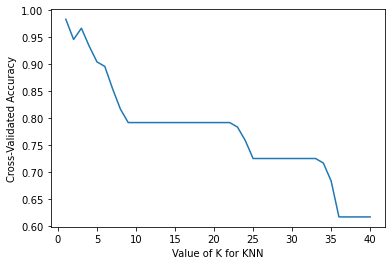

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=40)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()